# <center> INDIAN POPULATION REGRESSION ANALYSIS

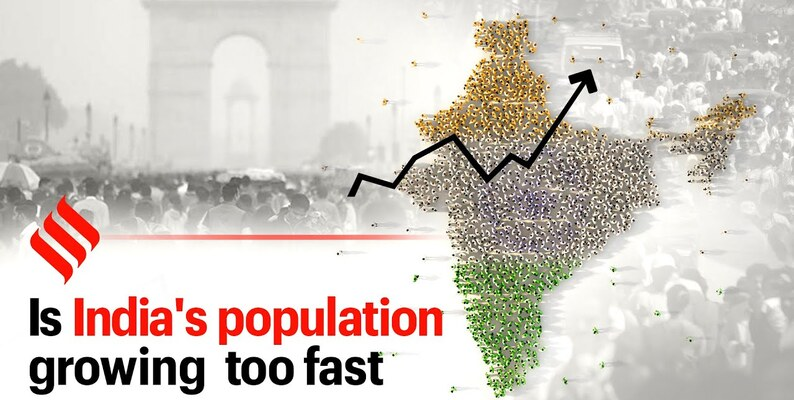

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib as k
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv('population INDIA.csv')
data.head(5)

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322


### Renaming the columns

In [3]:
k.clean_column_names(data)

Long column names detected (>25 characters). Consider renaming the following columns ['country_s_share_of_world_pop'].


,year,yearly_percent_change,yearly_change,migrants_net,median_age,fertility_rate,density_p_km²,urban_pop_percent,urban_population,country_s_share_of_world_pop,world_population,india_global_rank,population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322
5,2025,0.92,13001447,-464081.0,30.0,2.24,486,37.6,542742539,17.66,8184437460,2,1445011620
6,2020,1.04,13970396,-532687.0,28.4,2.24,464,35.0,483098640,17.70,7794798739,2,1380004385
7,2019,1.02,13775474,-532687.0,27.1,2.36,460,34.5,471828295,17.71,7713468100,2,1366417754
8,2018,1.04,13965495,-532687.0,27.1,2.36,455,34.1,460779764,17.73,7631091040,2,1352642280
9,2017,1.07,14159536,-532687.0,27.1,2.36,450,33.6,449963381,17.74,7547858925,2,1338676785


In [4]:
data.rename(columns={'country_s_share_of_world_pop':'countrys_share_world_pop'},inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      24 non-null     int64  
 1   yearly_percent_change     24 non-null     float64
 2   yearly_change             24 non-null     int64  
 3   migrants_net              23 non-null     float64
 4   median_age                24 non-null     float64
 5   fertility_rate            24 non-null     float64
 6   density_p_km²             24 non-null     int64  
 7   urban_pop_percent         24 non-null     float64
 8   urban_population          24 non-null     int64  
 9   countrys_share_world_pop  24 non-null     float64
 10  world_population          24 non-null     object 
 11  india_global_rank         24 non-null     int64  
 12  population                24 non-null     int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 2.6+ KB


In [6]:
data.shape

(24, 13)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,24.0,2.005000e+03,2.748913e+01,1.955000e+03,1.983750e+03,2.012500e+03,2.021250e+03,2.050000e+03
yearly_percent_change,24.0,1.412917e+00,6.668973e-01,2.300000e-01,9.950000e-01,1.335000e+00,2.010000e+00,2.330000e+00
yearly_change,24.0,1.286815e+07,4.239948e+06,3.711367e+06,9.941006e+06,1.387048e+07,1.565104e+07,1.853059e+07
migrants_net,23.0,-2.525709e+05,2.861754e+05,-5.326870e+05,-5.005920e+05,-4.147720e+05,-2.597250e+04,4.212080e+05
median_age,24.0,2.596250e+01,5.752188e+00,1.930000e+01,2.067500e+01,2.595000e+01,2.880000e+01,3.810000e+01
fertility_rate,24.0,3.479583e+00,1.447566e+00,2.240000e+00,2.240000e+00,2.600000e+00,4.752500e+00,5.900000e+00
density_p_km²,24.0,3.745833e+02,1.364337e+02,1.380000e+02,2.567500e+02,4.280000e+02,4.695000e+02,5.510000e+02
urban_pop_percent,24.0,3.153750e+01,1.010806e+01,1.760000e+01,2.397500e+01,3.175000e+01,3.565000e+01,5.350000e+01
urban_population,24.0,3.881687e+08,2.378749e+08,7.195850e+07,1.829768e+08,4.049070e+08,4.980096e+08,8.766130e+08
countrys_share_world_pop,24.0,1.677625e+01,1.098227e+00,1.478000e+01,1.599500e+01,1.725500e+01,1.770250e+01,1.775000e+01


In [8]:
data.isnull().mean()*100

year                        0.000000
yearly_percent_change       0.000000
yearly_change               0.000000
migrants_net                4.166667
median_age                  0.000000
fertility_rate              0.000000
density_p_km²               0.000000
urban_pop_percent           0.000000
urban_population            0.000000
countrys_share_world_pop    0.000000
world_population            0.000000
india_global_rank           0.000000
population                  0.000000
dtype: float64

In [9]:
data.duplicated().sum()

0

### Univariate Analysis


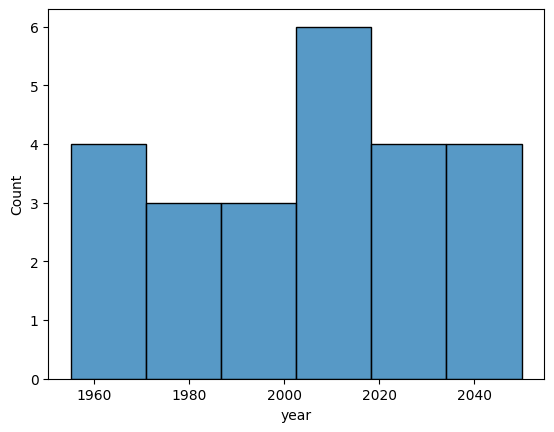

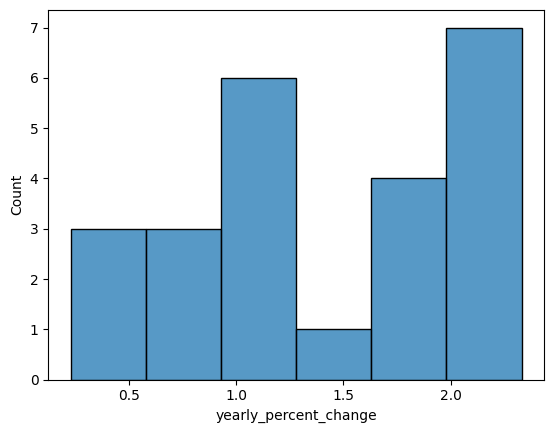

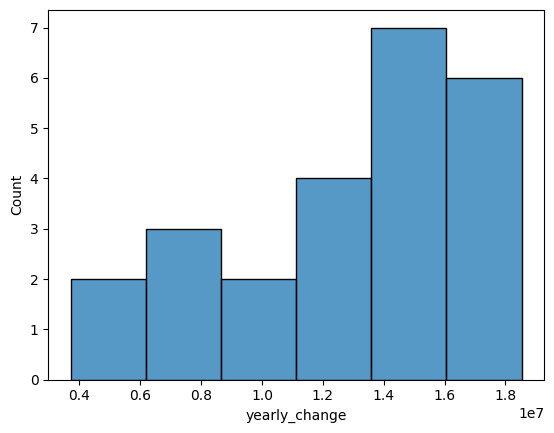

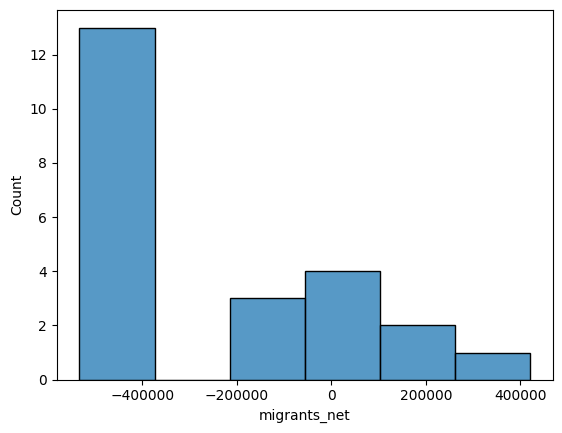

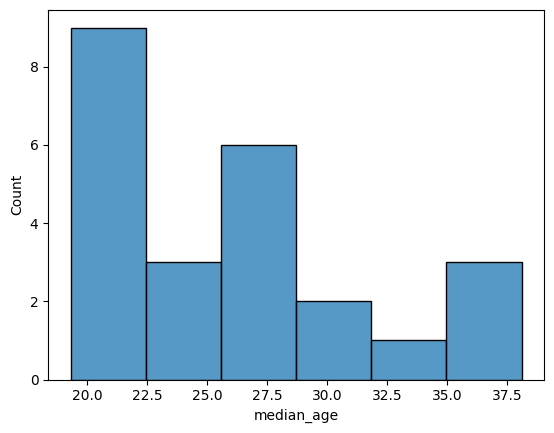

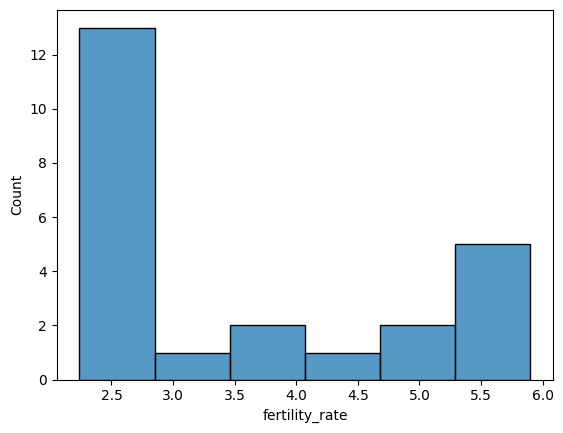

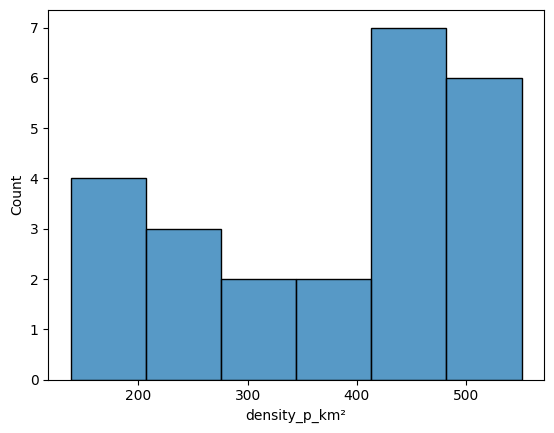

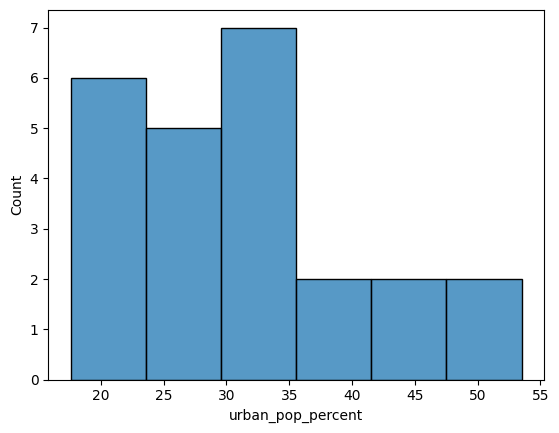

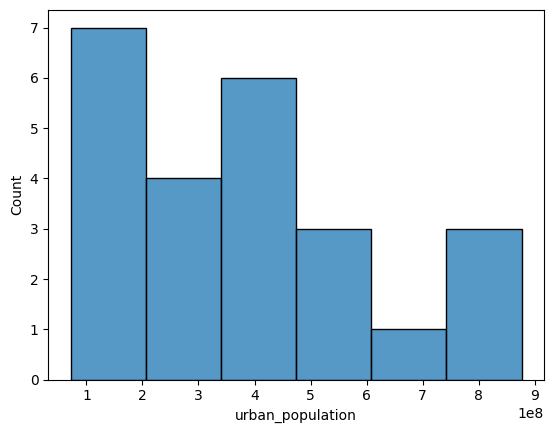

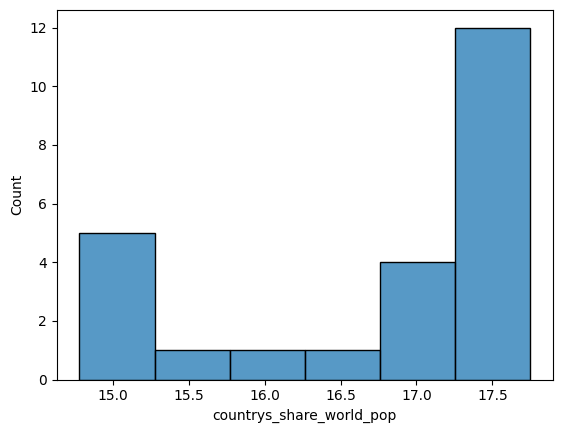

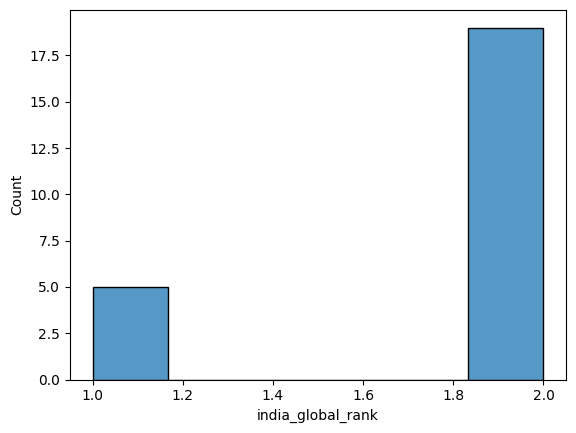

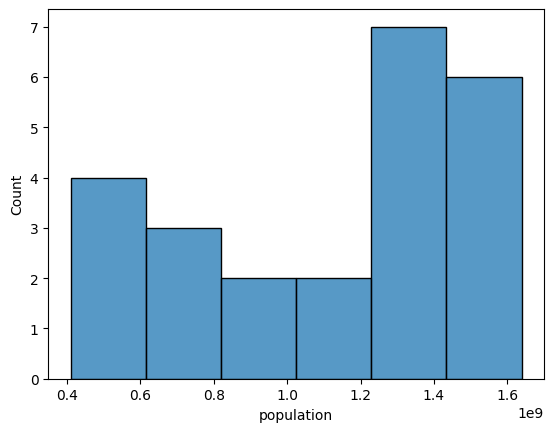

In [10]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x =data[i] )
        plt.show()

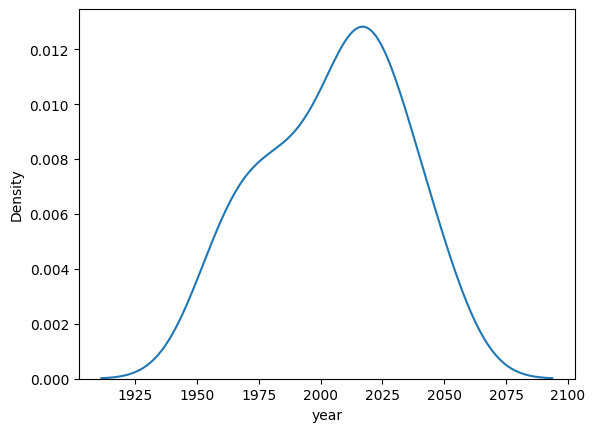

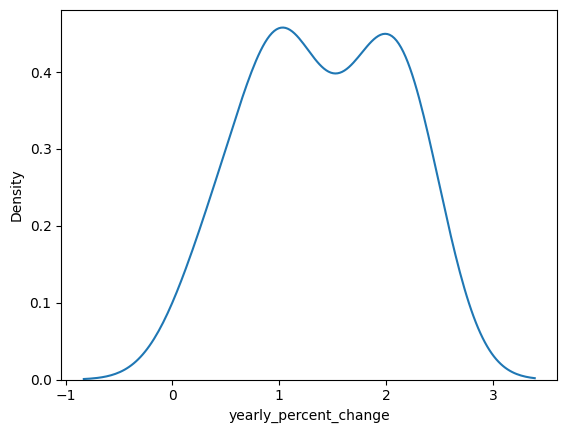

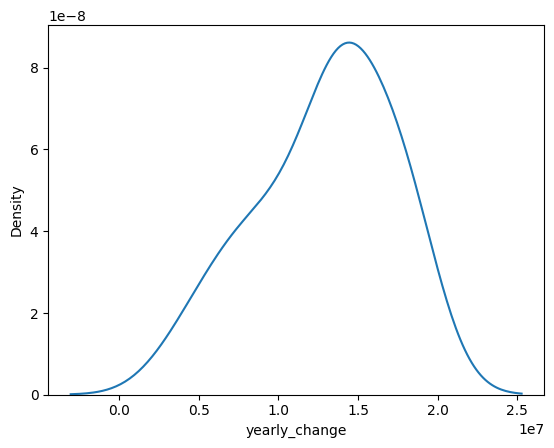

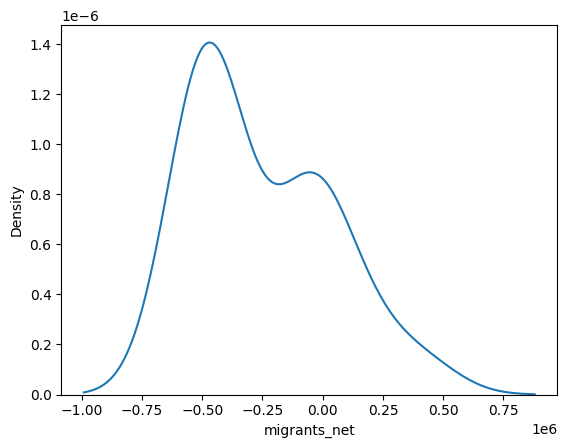

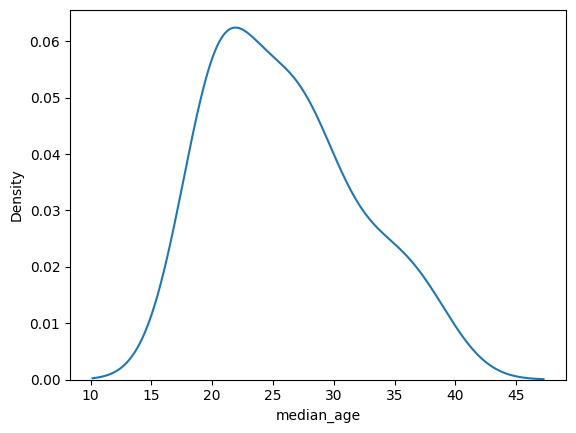

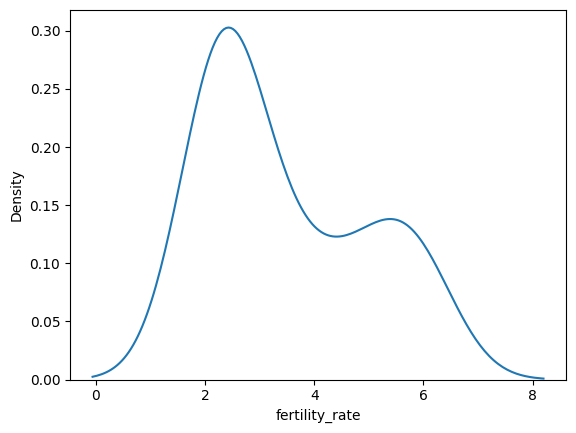

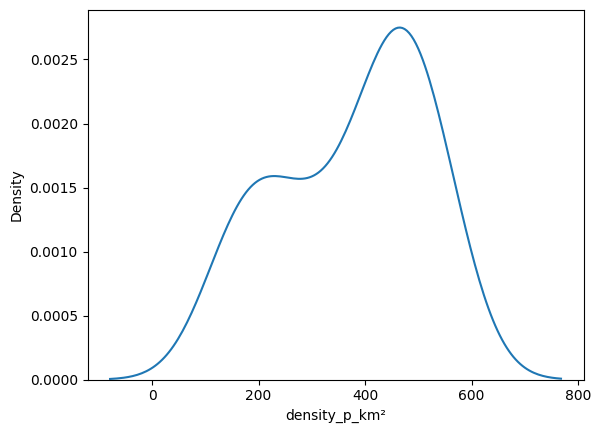

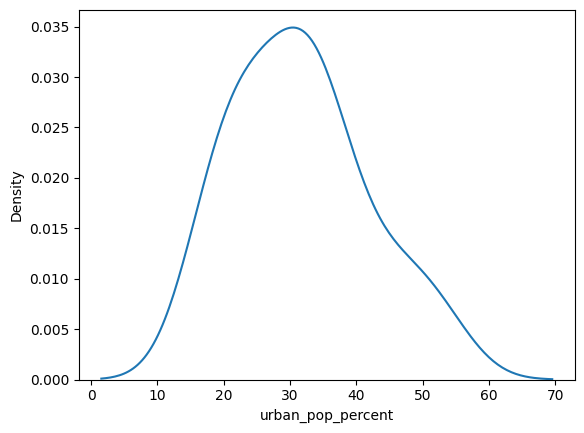

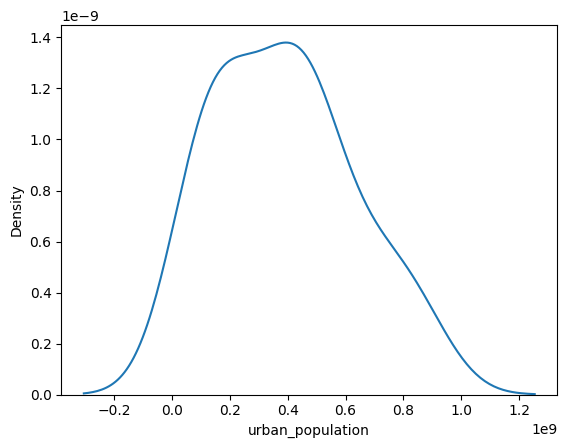

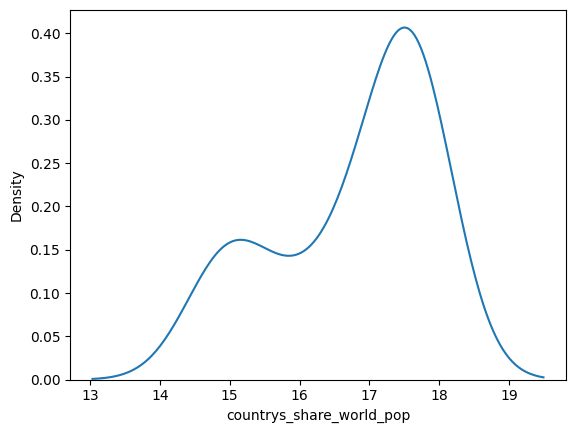

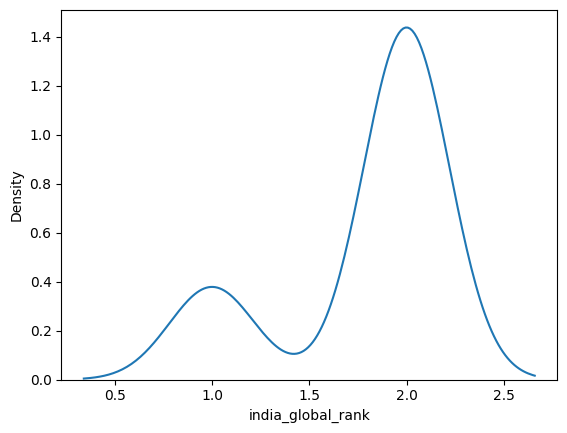

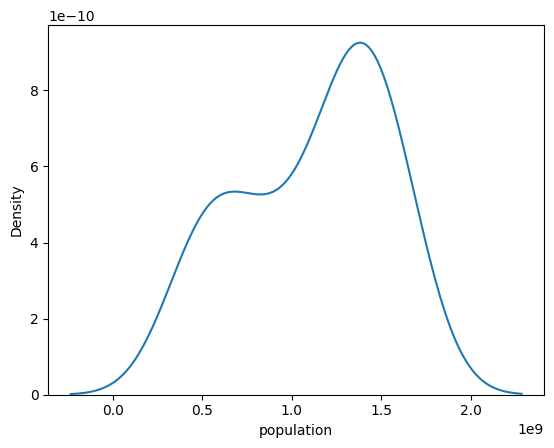

In [11]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x =data[i] )
        plt.show()   

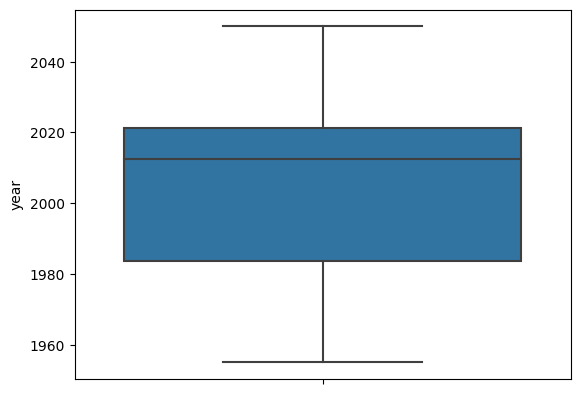

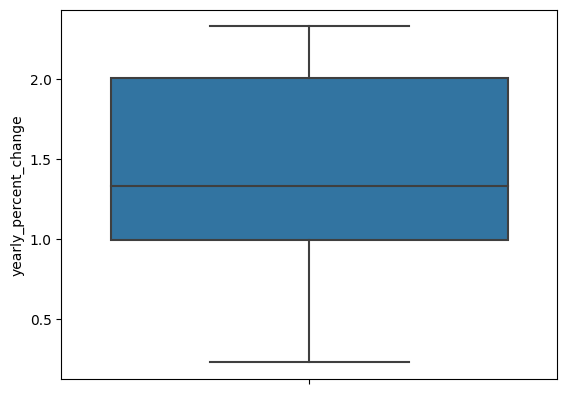

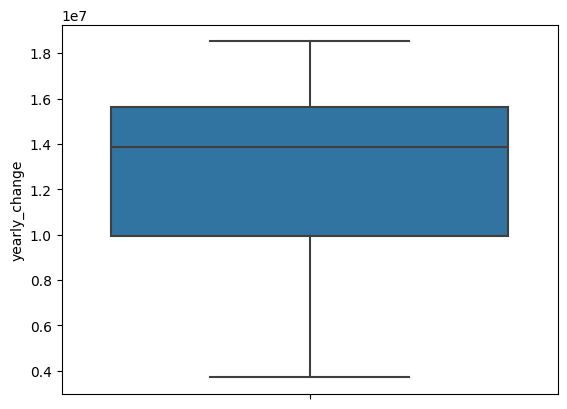

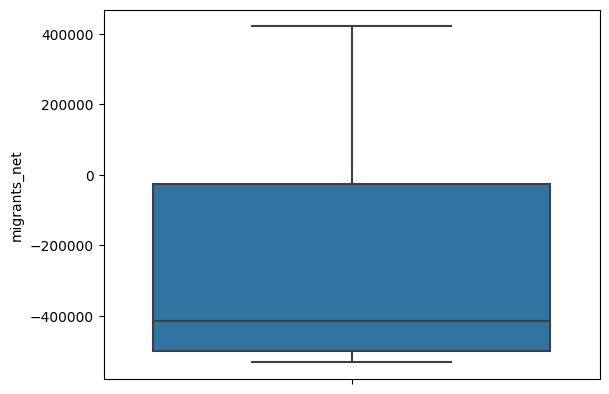

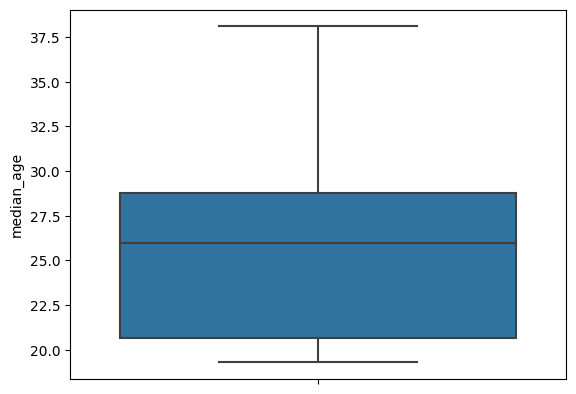

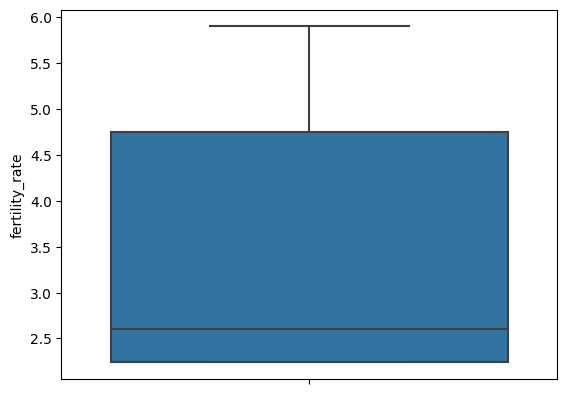

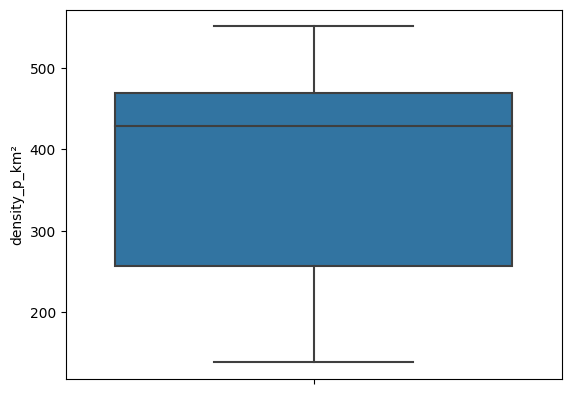

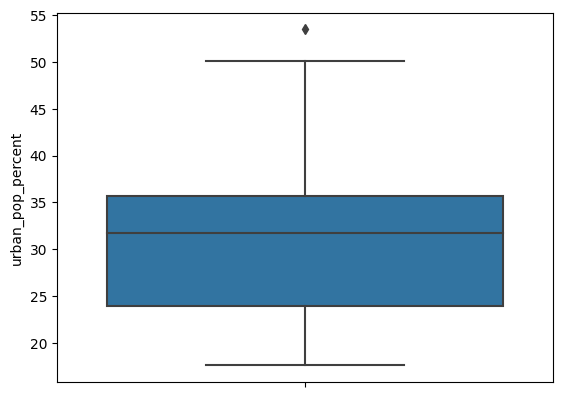

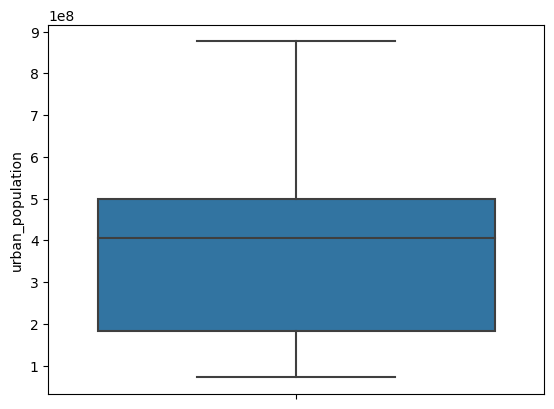

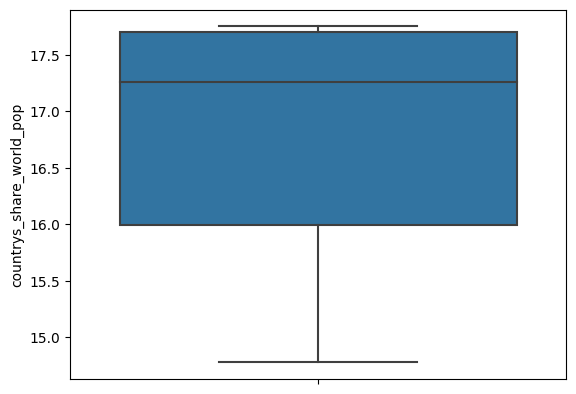

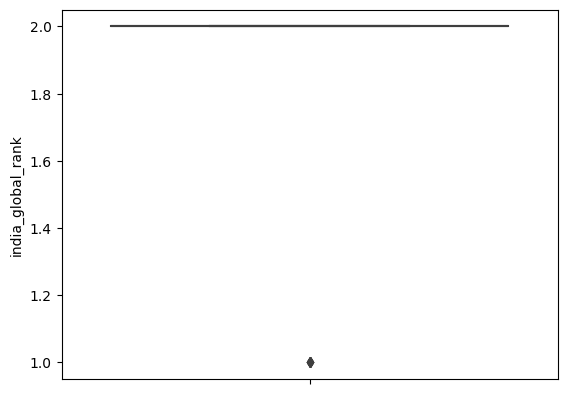

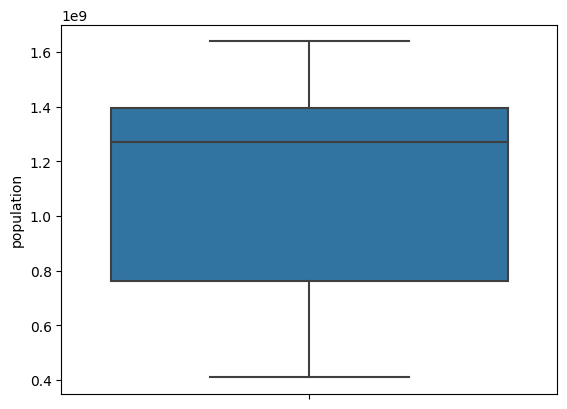

In [12]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y=data[i] )
        plt.show()   

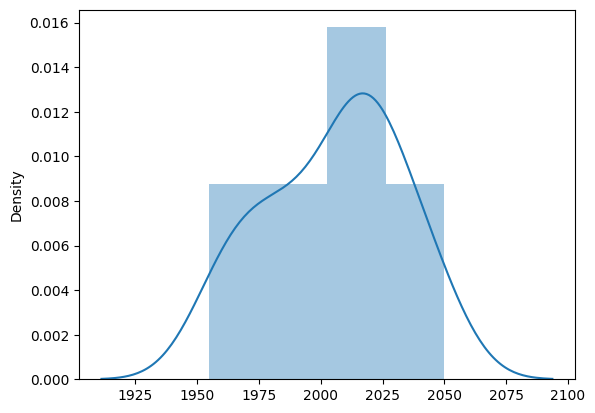

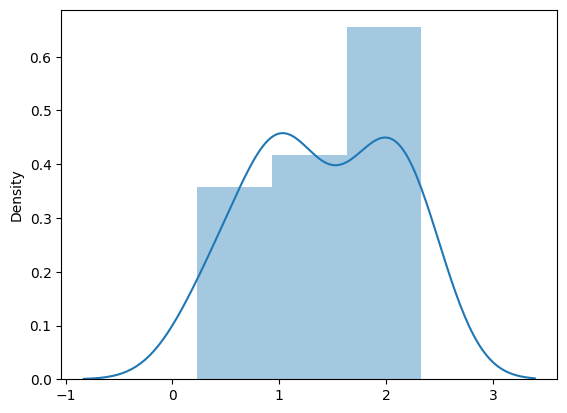

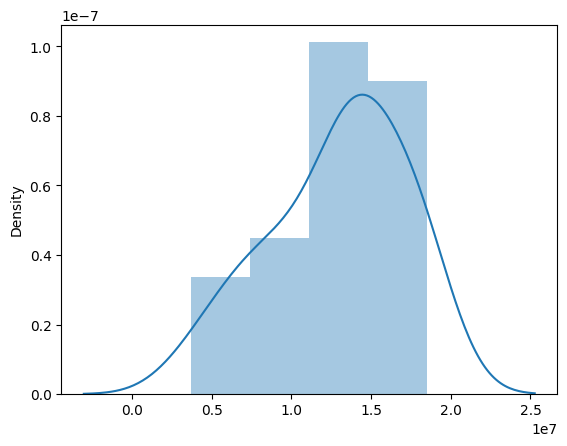

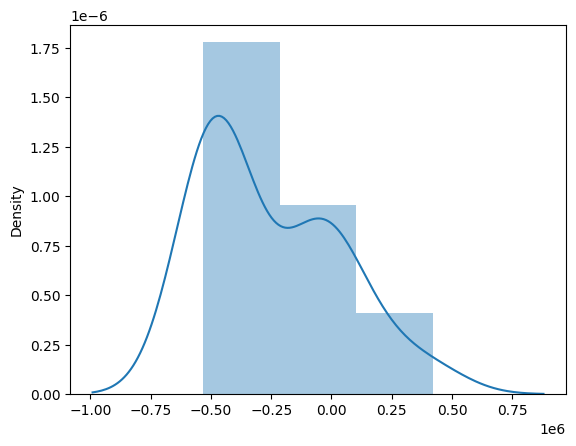

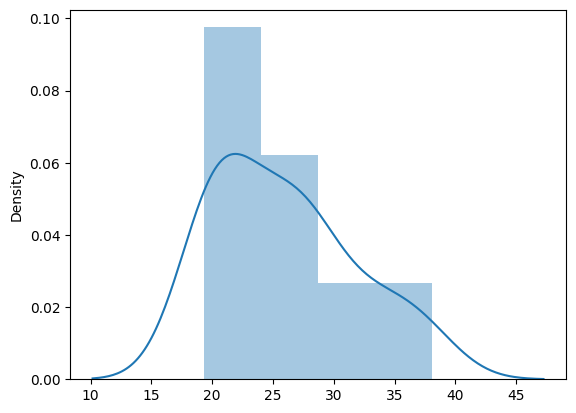

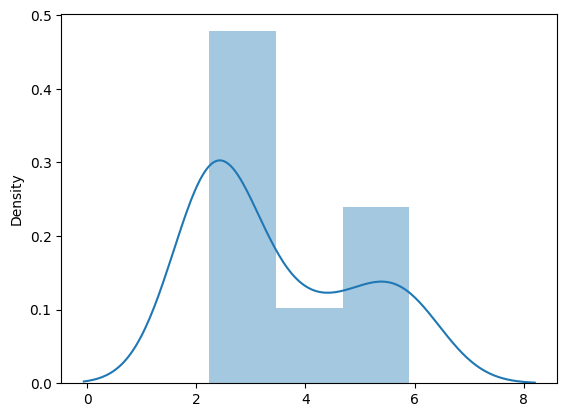

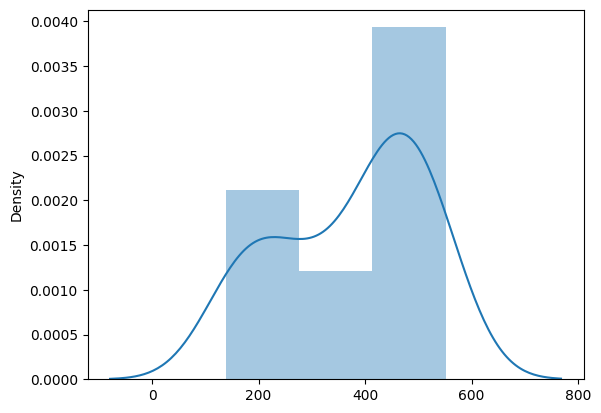

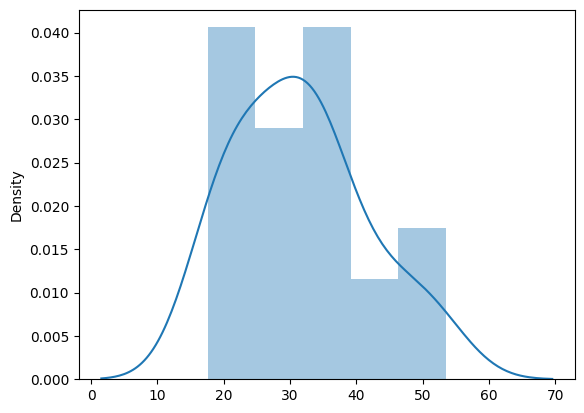

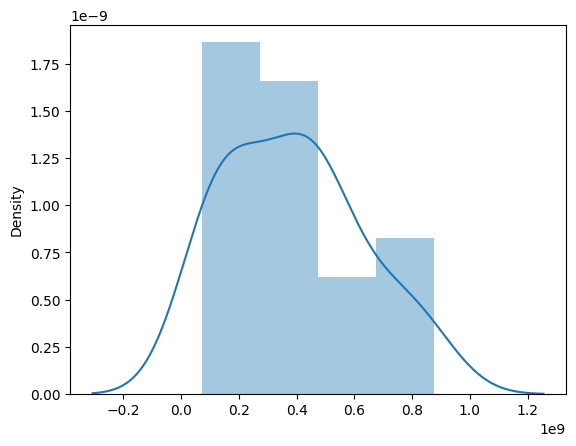

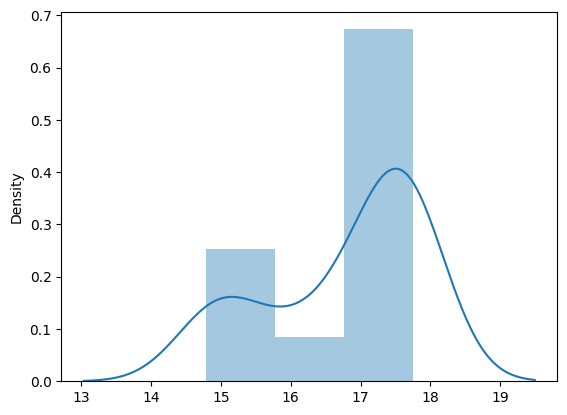

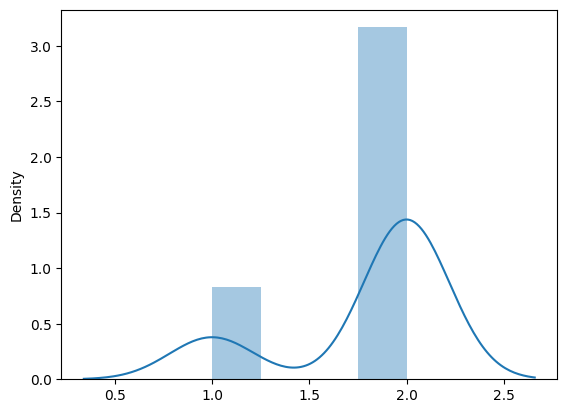

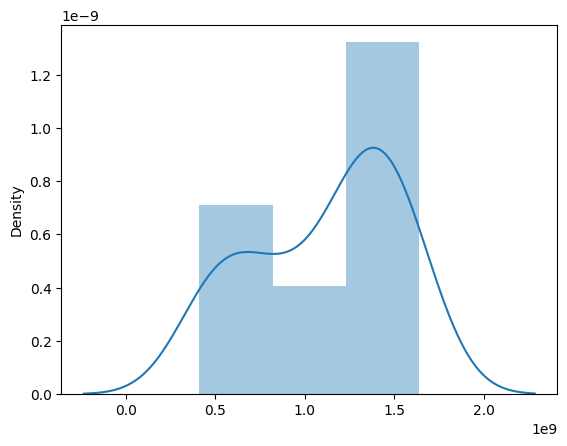

In [13]:
for i in data.columns:
    if data[i].dtypes !="object":
        sns.distplot(x =data[i])
        plt.show()     

In [14]:
data.dropna(inplace=True)

### Multi variate analysis

In [15]:
data

,year,yearly_percent_change,yearly_change,migrants_net,median_age,fertility_rate,density_p_km²,urban_pop_percent,urban_population,countrys_share_world_pop,world_population,india_global_rank,population
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322
5,2025,0.92,13001447,-464081.0,30.0,2.24,486,37.6,542742539,17.66,8184437460,2,1445011620
6,2020,1.04,13970396,-532687.0,28.4,2.24,464,35.0,483098640,17.70,7794798739,2,1380004385
7,2019,1.02,13775474,-532687.0,27.1,2.36,460,34.5,471828295,17.71,7713468100,2,1366417754
8,2018,1.04,13965495,-532687.0,27.1,2.36,455,34.1,460779764,17.73,7631091040,2,1352642280
9,2017,1.07,14159536,-532687.0,27.1,2.36,450,33.6,449963381,17.74,7547858925,2,1338676785
10,2016,1.10,14364846,-532687.0,27.1,2.36,445,33.2,439391699,17.75,7464022049,2,1324517249


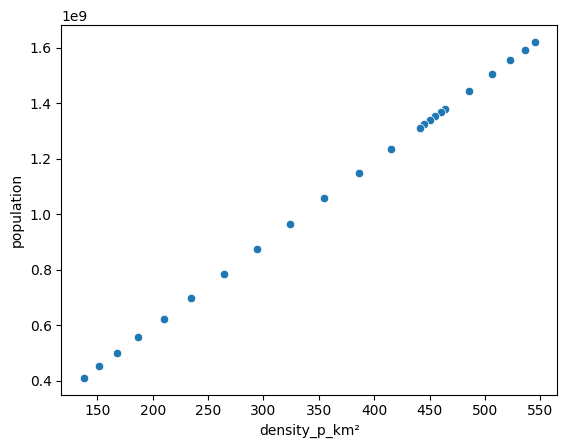

In [16]:
sns.scatterplot(x='density_p_km²',y='population',data=data);

#### Lets sort the data set by ascending order of year.

In [17]:
data.sort_values(by='year', inplace=True)

In [18]:
data.columns

Index(['year', 'yearly_percent_change', 'yearly_change', 'migrants_net',
       'median_age', 'fertility_rate', 'density_p_km²', 'urban_pop_percent',
       'urban_population', 'countrys_share_world_pop', 'world_population',
       'india_global_rank', 'population'],
      dtype='object')

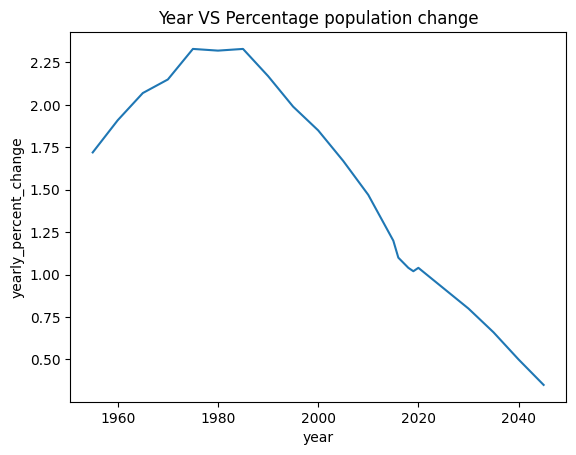

In [19]:
plt.title('Year VS Percentage population change')
sns.lineplot(x='year', y='yearly_percent_change', data=data);

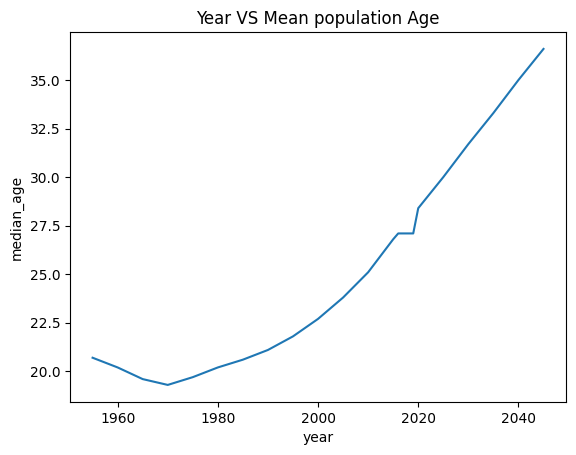

In [20]:
plt.title('Year VS Mean population Age')
sns.lineplot(x='year', y='median_age', data=data);

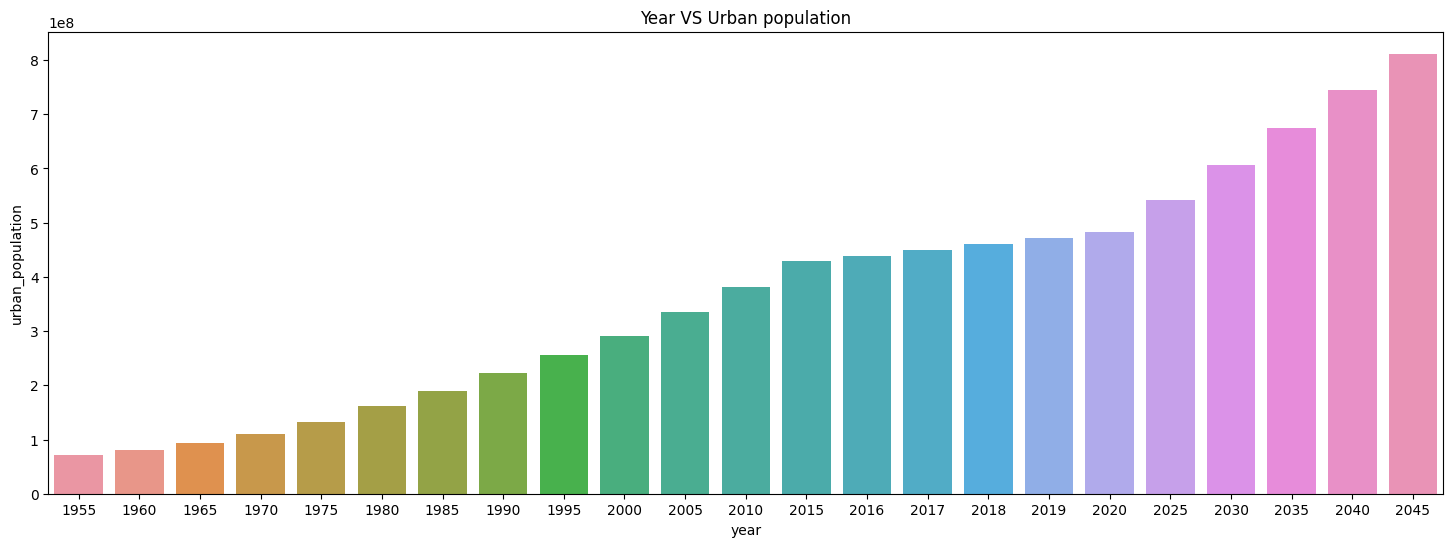

In [21]:
plt.figure(figsize=(18,6))
plt.title('Year VS Urban population')
sns.barplot(x='year', y='urban_population', data=data);

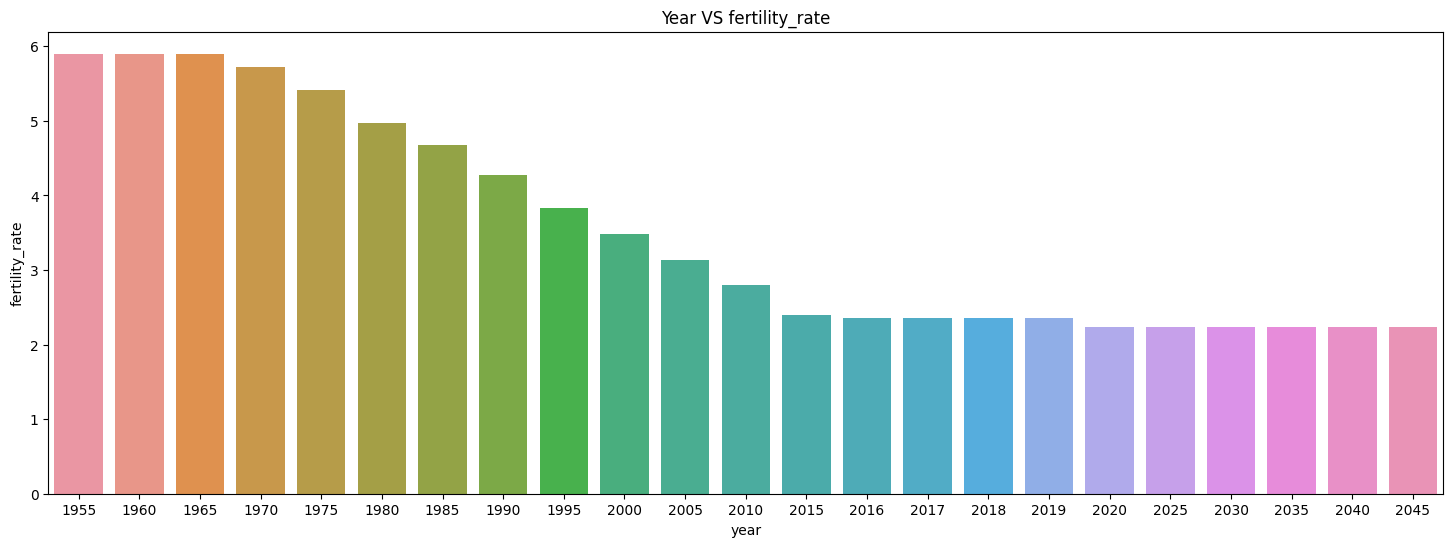

In [22]:
plt.figure(figsize=(18,6))
plt.title('Year VS fertility_rate')
sns.barplot(x='year', y='fertility_rate', data=data);

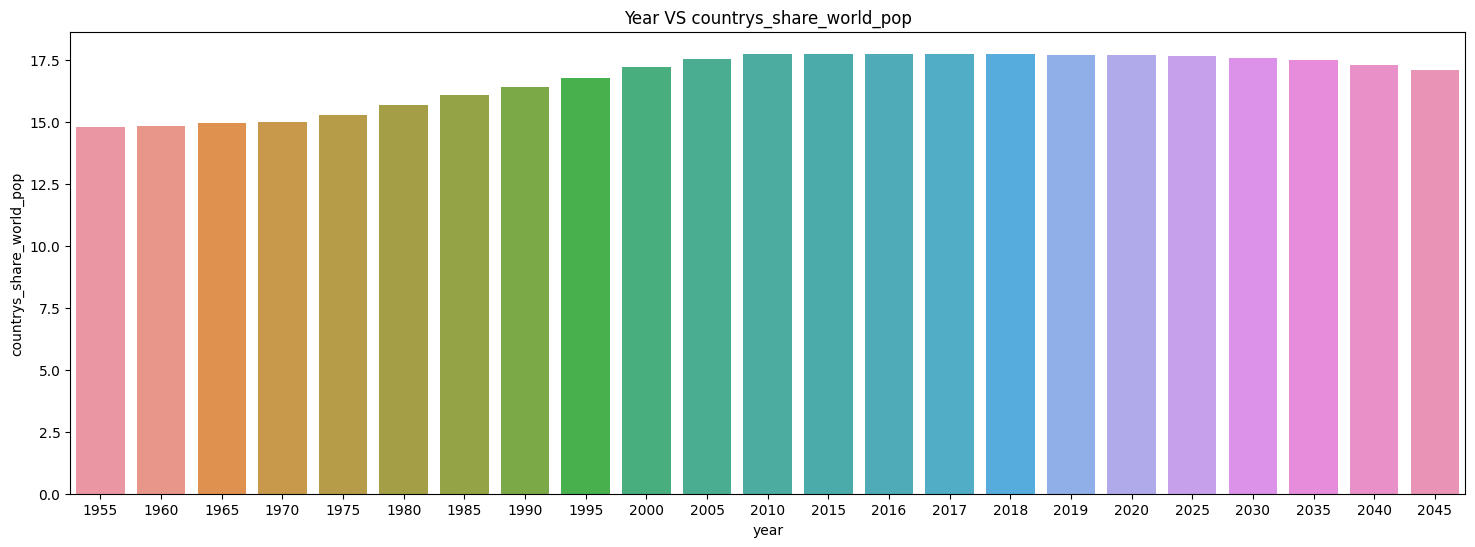

In [23]:
plt.figure(figsize=(18,6))
plt.title('Year VS countrys_share_world_pop')
sns.barplot(x='year', y='countrys_share_world_pop', data=data);

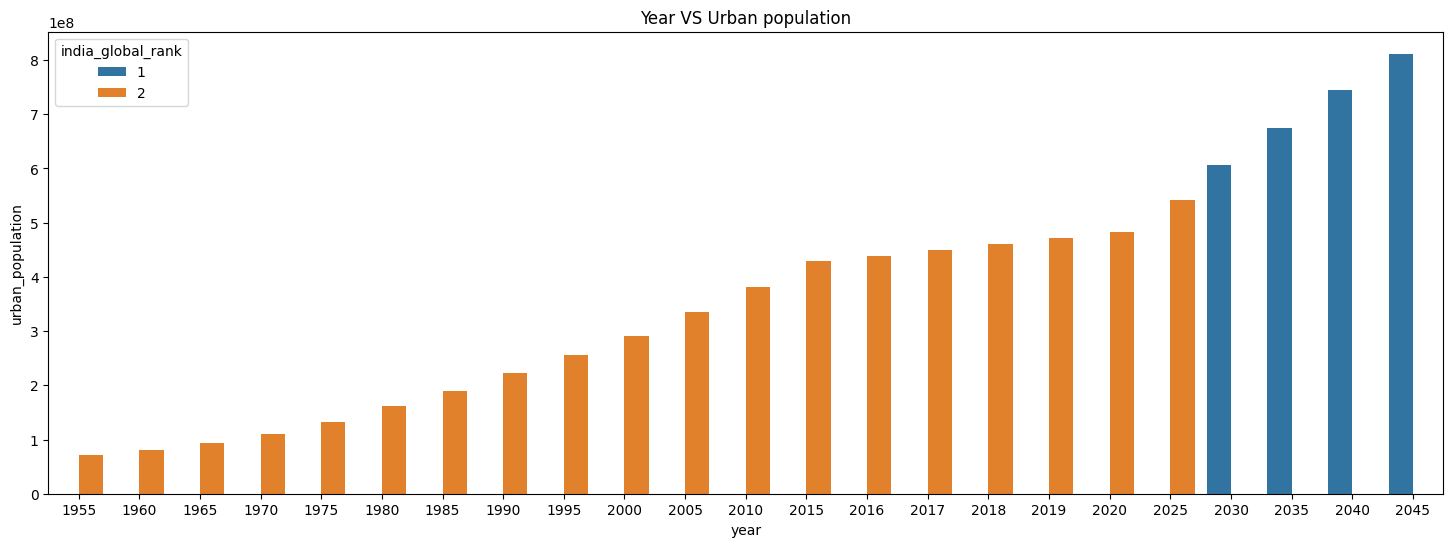

In [24]:
plt.figure(figsize=(18,6))
plt.title('Year VS Urban population')
sns.barplot(x='year', y='urban_population',hue= 'india_global_rank',data=data);

In [25]:
data

,year,yearly_percent_change,yearly_change,migrants_net,median_age,fertility_rate,density_p_km²,urban_pop_percent,urban_population,countrys_share_world_pop,world_population,india_global_rank,population
23,1955,1.72,6711079,-21140.0,20.7,5.90,138,17.6,71958495,14.78,"2,77,30,19,936",2,409880595
22,1960,1.91,8133417,-30805.0,20.2,5.90,152,17.9,80565723,14.85,3034949748,2,450547679
21,1965,2.07,9715129,-17078.0,19.6,5.89,168,18.7,93493844,14.95,3339583597,2,499123324
20,1970,2.15,11213294,-68569.0,19.3,5.72,187,19.7,109388950,15.00,3700437046,2,555189792
19,1975,2.33,13582621,421208.0,19.7,5.41,210,21.3,132533810,15.27,4079480606,2,623102897
18,1980,2.32,15169989,222247.0,20.2,4.97,235,23.0,160941941,15.68,4458003514,2,698952844
17,1985,2.33,17081433,115942.0,20.6,4.68,264,24.3,190321782,16.10,4870921740,2,784360008
16,1990,2.17,17783558,9030.0,21.1,4.27,294,25.5,222296728,16.39,5327231061,2,873277798
15,1995,1.99,18128958,-110590.0,21.8,3.83,324,26.5,255558824,16.78,5744212979,2,963922588
14,2000,1.85,18530592,-136514.0,22.7,3.48,355,27.6,291350282,17.20,6143493823,2,1056575549


#### We can see that there is a decrease in popuation growth over the years, after 1990's.

### CHECKING THE CORRELATION WITH THE TARGET 'POPULATION'

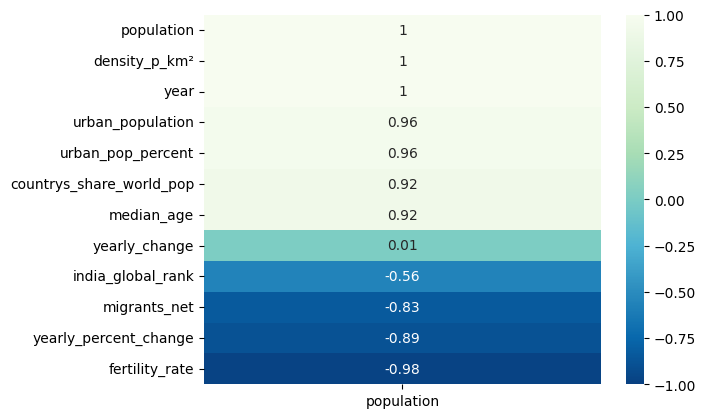

In [26]:
sns.heatmap(data.corr()[['population']].sort_values(by='population',ascending=False),vmin=-1,vmax=1,annot=True,cmap='GnBu_r');

In [27]:
x=data[['year','density_p_km²','urban_population','urban_pop_percent','countrys_share_world_pop','median_age']].values

In [28]:
y=data[['population']].values

### Feature scaling

In [29]:
sc=StandardScaler()

In [30]:
x=sc.fit_transform(x)

## Selecting into training and testing data

In [31]:
models = {
"LinearRegression": LinearRegression(),
"Ridge":Ridge(),
"Lasso":Lasso(),
"LinearSVR":LinearSVR(),
"DecisionTreeRegressor":DecisionTreeRegressor(),
"GradientBoostingRegressor":GradientBoostingRegressor(),
"AdaBoostRegressor":AdaBoostRegressor(),
"RandomForestRegressor":RandomForestRegressor()
}

In [32]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)
    

cross validation model : LinearRegression
AVERAGE RMSE:  1631509.3741544005
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  18765995.703484345
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  10456867.550336177
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  1157553431.891629
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  66031391.8820485
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  61945712.32459213
**********************************************************

## Selecting LinearRegression as it is having best metrics

In [33]:
model= LinearRegression()

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=model.predict(x)

In [37]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("Actual","Prediction"),dtype=float)

In [38]:
OUTPUT.head()

,Actual,Prediction
0,409880595.0,4.093786e+08
1,450547679.0,4.514447e+08
2,499123324.0,4.989283e+08
3,555189792.0,5.547624e+08
4,623102897.0,6.233856e+08


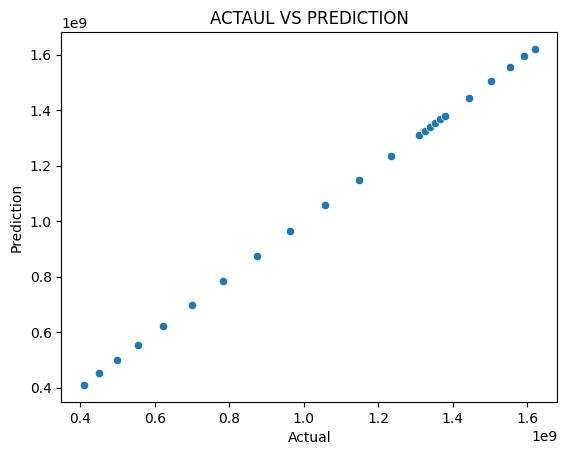

In [39]:
plt.title("ACTAUL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="Actual", y="Prediction");